In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import ipaddress
from ipaddress import ip_address

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DDOS/Merged data /final_data.csv")
data = data.drop(['Unnamed: 0','history','conn_state'],axis=1)
data.head()

,id.resp_p,proto,duration,missed_bytes,orig_pkts,orig_ip_bytes,Label
0,22,tcp,0.041537,0,3,120,Normal
1,443,tcp,0.000000,0,0,0,Normal
2,22,tcp,0.093085,0,4,172,Normal
3,22,tcp,0.074172,0,4,172,Normal
4,443,tcp,0.647492,0,10,839,Normal


In [ ]:
data['history']=data['history'].replace('-',np.nan)

In [ ]:
data.isnull().sum()

id.resp_p        0
proto            0
duration         0
conn_state       0
missed_bytes     0
history          2
orig_pkts        0
orig_ip_bytes    0
Label            0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
A = data[data['Label']=='Normal']
B = data[data['Label']=='DDoS']

In [ ]:
A_ = len(A)/len(data)*100
B_= len(B)/len(data)*100

In [ ]:
print("Label_A :",A_,"%" )
print("Label_B :",B_,"%" )

Label_A : 47.83360079002592 %
Label_B : 52.16639920997408 %


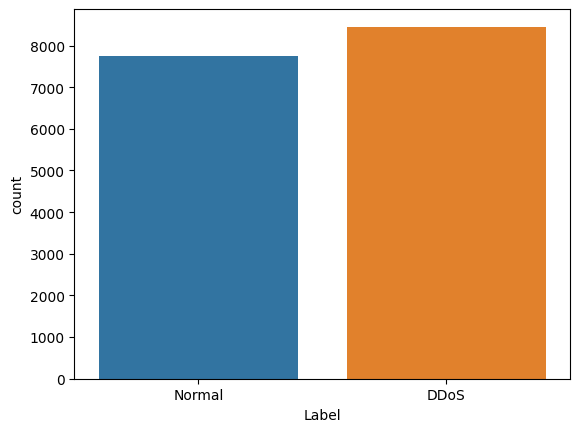

In [ ]:
sns.countplot(x='Label',data=data)
plt.show()

 ### Seprate Dependent and Indepent Features

In [ ]:
y = data["Label"]
X = data.drop("Label",axis=1)
len(y),len(X)

(16202, 16202)

 ### Train-Test-Split

In [ ]:
X_train, X_test, y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=0)

len(X_train),len(y_train),len(X_test),len(y_test)

(12961, 12961, 3241, 3241)

 ### Train Model

In [ ]:
X.head()

,id.resp_p,proto,duration,missed_bytes,orig_pkts,orig_ip_bytes
0,22,tcp,0.041537,0,3,120
1,443,tcp,0.000000,0,0,0
2,22,tcp,0.093085,0,4,172
3,22,tcp,0.074172,0,4,172
4,443,tcp,0.647492,0,10,839


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16202 entries, 0 to 16201
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id.resp_p      16202 non-null  int64  
 1   proto          16202 non-null  object 
 2   duration       16202 non-null  float64
 3   conn_state     16202 non-null  object 
 4   missed_bytes   16202 non-null  int64  
 5   orig_pkts      16202 non-null  int64  
 6   orig_ip_bytes  16202 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 886.2+ KB


In [ ]:

trf1 = ColumnTransformer(
[
    ("Label Encoding",OneHotEncoder(),[1])
],remainder='passthrough')

trf2 = ColumnTransformer(
[
    ("Scalling",StandardScaler(with_mean=False),[0,1,2,3,4,5])
],remainder='passthrough')

In [ ]:
trf3= ColumnTransformer(
[
    ('Numerica_Imputer',SimpleImputer(),[0,1,2,3,4,5]),
],remainder='passthrough'
)

In [ ]:
trf4 = RandomForestClassifier()

In [ ]:
pipe =make_pipeline(trf1,trf2,trf3,trf4)

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Label Encoding',
                                                  OneHotEncoder(), [1])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scalling',
                                                  StandardScaler(with_mean=False),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('columntransformer-3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerica_Imputer',
                                                  SimpleImputer(),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('randomforestclassifier', RandomForestClassifier())])

### Save Model

In [ ]:
filename = '/content/drive/MyDrive/DDOS/Code/DDoS_Model.sav'
pickle.dump(pipe, open(filename, 'wb'))

### Load Model

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

## Accuracy Testing

### Predict the values

In [ ]:
y_predict = loaded_model.predict(X_test)

### Making Confusion Matrics

In [ ]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[1724,    0],
       [   0, 1517]])

### Score

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5,scoring='accuracy').mean()